In [5]:
%matplotlib inline
import matplotlib
import pandas as pd # package for data analysis, reading in the data, summarizing data, manipulating data
import numpy as np # package for math operations
import matplotlib.pyplot as plt # package for plotting
from IPython.display import Image

# KAGGLE COMPETITION

* Hands-on experience with data science and machine learning
* You only learn by doing!
* Register yourself on [Kaggle](https://www.kaggle.com/)
* Fill out Name, Location (both city and country) and Occupation so that you can win prizes in the state of Massachusetts
* **February 15, 2018** - Entry deadline. You must accept the competition rules by this date in order to compete.
* **February 15, 2018** - Team Merger deadline. This is the last day competitors may join or merge teams.
* **February 28, 2018** - Final submission deadline
* Note the submission instructions and how you will be evaluated

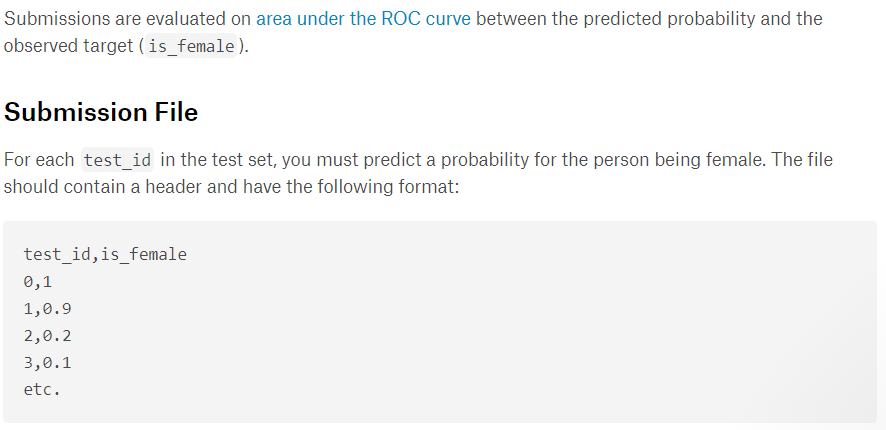

In [6]:
Image(filename='images/submission.PNG', width = 900, height = 500)

# Winning strategies
* Feature engineering - creating variables that might correlate well with the target
* Testing many hypotheses for feature engineering
* Model choice: ensembles of different models
* Save predictions from all of your models to build an ensemble of models later
* [Take a look at past solutions](https://www.hackerearth.com/practice/machine-learning/advanced-techniques/winning-tips-machine-learning-competitions-kazanova-current-kaggle-3/tutorial/)

# Dataset - Hubway Bike Rentals
* Bike trips taken with variety of metrics collected on the trip
* Questions that the data can answer:
  * Where do Hubway users ride? 
  * When do they ride? 
  * How far do they go? 
  * Which stations are most popular? 
  * On what days of the week are most rides taken? 
  * How do user patterns differ between members and casual riders? 

# DATA EXPLORATION

# First look at the data

* Read in raw data - we will be using [Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) package to make a DataFrame
* What are the attributes of the data?
* Summary statistics

In [7]:
hubway_data = pd.read_csv('hubway_trips.csv') # read in the data as a DataFrame
hubway_data.head() # shows the first couple of rows of the dataset

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


What is the dimensionality of our dataset (number of rows, number of columns)?

In [8]:
print(hubway_data.shape) # what is the dimensionality of our dataset (number of rows, number of columns)

(1579025, 13)


Summary statistics for our dataset for both numerical and categorical variables:

In [9]:
hubway_data.describe(include = 'all') # get counts and summary statistics for the data (include is to show results for numerical and categorical data)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
count,1.579025e+06,1.579025e+06,1579025,1.579025e+06,1579025,1.579011e+06,1579025,1.578980e+06,1578559,1579025,1106259,350644.000000,1106414
unique,NaN,NaN,1,NaN,521432,NaN,515102,NaN,1163,2,530,NaN,2
top,NaN,NaN,Closed,NaN,7/30/2013 17:18:00,NaN,10/19/2013 16:26:00,NaN,B00490,Registered,'02118,NaN,Male
freq,NaN,NaN,1579025,NaN,25,NaN,27,NaN,2138,1106414,121749,NaN,834714
mean,7.895130e+05,8.865317e+05,NaN,1.200280e+03,NaN,5.438039e+01,NaN,5.425603e+01,NaN,NaN,NaN,1976.295322,NaN
std,4.558254e+05,5.064783e+05,NaN,2.653539e+04,NaN,3.364295e+01,NaN,3.347219e+01,NaN,NaN,NaN,10.999742,NaN
min,1.000000e+00,8.000000e+00,NaN,-6.900000e+03,NaN,3.000000e+00,NaN,3.000000e+00,NaN,NaN,NaN,1932.000000,NaN
25%,3.947570e+05,4.465250e+05,NaN,4.120000e+02,NaN,2.700000e+01,NaN,2.900000e+01,NaN,NaN,NaN,1969.000000,NaN
50%,7.895130e+05,8.950440e+05,NaN,6.600000e+02,NaN,4.800000e+01,NaN,4.800000e+01,NaN,NaN,NaN,1979.000000,NaN
75%,1.184269e+06,1.328083e+06,NaN,1.082000e+03,NaN,7.400000e+01,NaN,7.400000e+01,NaN,NaN,NaN,1985.000000,NaN


# Selecting and Filtering Data
* Select certain columns of the data

In [10]:
columns_you_want = ['start_date', 'end_date'] # specify columns you're interested in
chosen_columns = hubway_data[columns_you_want] # select the columns
chosen_columns.head() # show first couple of lines of this new variable 

,start_date,end_date
0,7/28/2011 10:12:00,7/28/2011 10:12:00
1,7/28/2011 10:21:00,7/28/2011 10:25:00
2,7/28/2011 10:33:00,7/28/2011 10:34:00
3,7/28/2011 10:35:00,7/28/2011 10:36:00
4,7/28/2011 10:37:00,7/28/2011 10:37:00


* Filter the data - let's get the data of all the millennials

In [11]:
millennials = hubway_data[hubway_data.birth_date > 1982] # select the birth_date column and only take entries that are larger than year 1982
millennials.head() # display first couple of lines

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female
8,9,16,Closed,8,7/28/2011 11:01:00,23.0,7/28/2011 11:01:00,23.0,B00554,Registered,'97214,1983.0,Female
9,10,17,Closed,1108,7/28/2011 11:55:00,47.0,7/28/2011 12:13:00,40.0,B00550,Registered,'01867,1994.0,Male
18,19,31,Closed,1020,7/28/2011 12:01:00,38.0,7/28/2011 12:18:00,36.0,B00147,Registered,'02118,1987.0,Female
19,20,33,Closed,1264,7/28/2011 12:01:00,38.0,7/28/2011 12:22:00,44.0,B00165,Registered,'02139,1985.0,Female


# Split Data by Groups
* [Split](https://pandas.pydata.org/pandas-docs/stable/groupby.html) bike trips by type of user (registered vs. casual)
* Are the bike trips between registered and casual users different in duration?

In [12]:
grouped_data = hubway_data.groupby('subsc_type') # split data
grouped_data.mean()['duration'] # calculate the mean for the variable duration

subsc_type
Casual        2293.442214
Registered     733.328984
Name: duration, dtype: float64

# Applying a Function
* Apply a function to a column of a DataFrame
* Let's transform start date to get a year when the bike was checked out

In [13]:
def get_checkout_year(s):
    # start date comes in the form of "7/28/2011 10:12:00"
    # get just the year digits
    return int(s[-13:-9])

In [14]:
check_out_year = hubway_data['start_date'].apply(get_checkout_year)
check_out_year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: start_date, dtype: int64

In [20]:
def convert_seconds2hours(sec):
    hours = sec/3600.0
    return hours

In [21]:
hubway_data['duration'] = hubway_data['duration'].apply(convert_seconds2hours)

# Join data from another dataset 
* Location (latitude and longitude) corresponsing to each bike station
* DataFrame.join is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

In [29]:
station_data = pd.read_csv('hubway_stations.csv')[['id', 'lat', 'lng']]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [30]:
hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng
0,1,8,Closed,0.002500,7/28/2011 10:12:00,23,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,42.359677,-71.059364
1,2,9,Closed,0.061111,7/28/2011 10:21:00,23,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,42.359677,-71.059364
2,3,10,Closed,0.015556,7/28/2011 10:33:00,23,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,42.359677,-71.059364
3,4,11,Closed,0.017778,7/28/2011 10:35:00,23,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,42.359677,-71.059364
4,5,12,Closed,0.003333,7/28/2011 10:37:00,23,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,42.359677,-71.059364


# DATA VISUALIZATION

* identify hidden patterns and trends
* formulate hypothesis
* determine best steps for modeling
* communicate results

* Scatter plots - numerical data
* Age vs. duration of bike trip 

In [31]:
age = check_out_year - hubway_data['birth_date'] # calculate age based on the recorded check out year

In [ ]:
short_duration = hubway_data[hubway_data.duration < 1]
age_filt = age[hubway_data.duration < 1]
age_filt

In [ ]:
# histograms, scatter plots, bar plot?
#And now for a second plot: scatter plot of age 
plt.scatter(age_filt, short_duration)
plt.title('Scatter plot of Duration by User Ages')
plt.xlabel('Age in years')
plt.ylabel('Duration (in hours)')
#plt.yscale('log')

KeyboardInterrupt: 

* Histograms - distribution of the variable
* Useful for identifying outliers, multi-modality

Text(0.5,1,'Histogram of User Age')

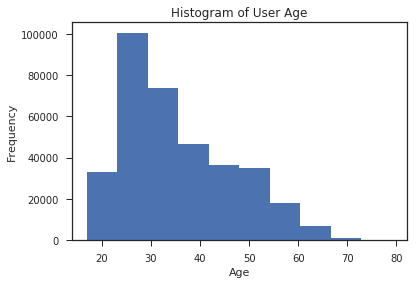

In [66]:
plt.hist(age.dropna(), bins = 10) # dropna gets rid of entries where age was not recorded
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of User Age')

* Bar plot - useful for categorical data
* Plot number of users by gender

In [ ]:
gender_counts = np.unique(hubway_data['gender'].replace(np.nan, 'NaN', regex=True).values, return_counts=True)

plt.bar(range(3), gender_counts[1], align='center', color=['black', 'green', 'teal'], alpha=0.5)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['none', 'male', 'female', ' '])
ax[0].set_title('Users by Gender')

* high-dimensional data - many variables - how to visualize and identify patterns

# DATA CLEANING

* missing data - how to fill it in?
* wrong values - how do we correct them?
* messy format
* drop rows with problematic values
* too many observations - do preliminary analysis on a subset of data
* use mean of the feature, most common value
* use regression to estimate the value

* Dropping missing values

In [69]:
hubway_data_droppped = hubway_data.dropna()

* Dropping wrong values

In [71]:
print('Minimum duration = ', np.min(hubway_data.duration))
print('Maximum duration = ', np.max(hubway_data.duration))
hubway_data_clean = hubway_data[hubway_data.duration > 0] # select
hubway_data_clean.shape

Minimum duration =  -6900
Maximum duration =  11994458


(1574587, 13)

In [ ]:
# seconds to days
1.1574e-5

# Feature Engineering

* what is the question you are trying to answer
* one-hot encoding of the categorical data
* how to deal with zipcode vector?

In [3]:
check_out_year = hubway_data['start_date'].apply(lambda s: int(s[-13:-9]))
age_col = (check_out_year - hubway_data['birth_date'])

In [18]:
len(np.unique(hubway_data['zip_code'].values))

TypeError: '<' not supported between instances of 'float' and 'str'

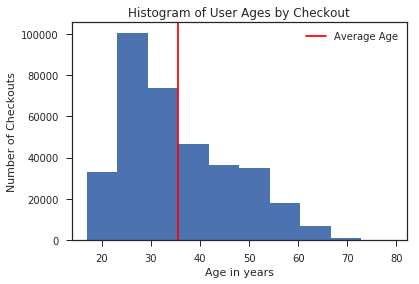

In [8]:
#a histogram of ages
plt.hist(age_col.dropna())
plt.title('Histogram of User Ages by Checkout')
plt.xlabel('Age in years')
plt.ylabel('Number of Checkouts')
plt.axvline(x=np.mean(age_col.dropna()), color='red', label='Average Age')
plt.legend()
plt.show()

# Data Transformation

In [30]:
# histograms, data plots
#And now for a second plot: scatter plot of age 
plt.scatter(age,hubway_data.duration)
plt.title('Scatter plot of Duration by User Ages')
plt.xlabel('Age in years')
plt.ylabel('Duration (in seconds)')
plt.yscale('log')
plt.show()

NameError: name 'age' is not defined

# Exercise
* Now it's your turn
* Exercise 1:
* Exercise 2:

In [28]:
Image(url='http://giventocode.com/Media/Default/Windows-Live-Writer/Geotag-your-Entities-using-Azure-Mobile-_FFE5/image_4.png', width = 200, height = 200)

In [ ]:
# exercise:
# group by user ID and count the number of checkouts (advanced)
# distance to center feature (easier)
# start writting code for them so that they can just complete it